# TASK 3: 

# Credit Card Fraud Detection



Dataset: https://www.kaggle.com/datasets/isaikumar/creditcardfraud

Steps to create the project:

Load the Credit Card Fraud Detection dataset into your Python environment. You can use a library like Pandas to load the dataset.

Pre-process the dataset by scaling the features and handling any missing values or outliers.
Split the dataset into training and testing sets.

Implement a classification algorithm to train your model. You can start with a simple algorithm like Logistic Regression or Support Vector Machines.

Train your model using the training set.

Evaluate your model's performance on the testing set using metrics like accuracy, precision, recall, and F1 score.

Use your model to predict whether a new credit card transaction is fraudulent or not.

Test your model by inputting new values for the features to see the predicted outcome.

In [24]:
import pandas as pd

# Load the dataset
data = pd.read_csv("C:\\Users\\Narthana\\Downloads\\creditcard.csv")


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


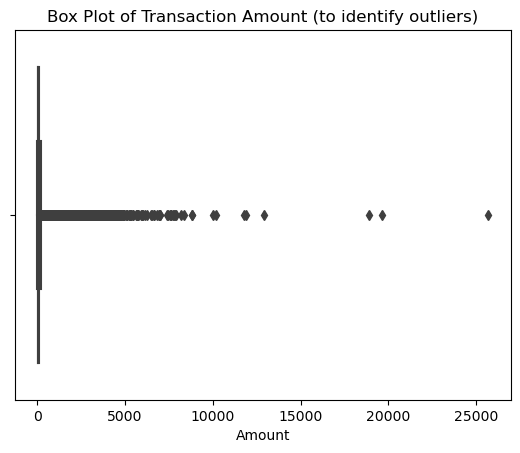

Statistics about Outliers in the 'Amount' Column:
Lower Bound: -101.7475
Upper Bound: 184.5125
Number of Outliers: 31904
Percentage of Outliers: 11.201971861646658 %


In [25]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Check for outliers in the 'Amount' column using box plot
sns.boxplot(x=data['Amount'])
plt.title('Box Plot of Transaction Amount (to identify outliers)')
plt.show()

# Print statistics about outliers in the 'Amount' column
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
print("Statistics about Outliers in the 'Amount' Column:")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Number of Outliers:", len(outliers))
print("Percentage of Outliers:", len(outliers) / len(data) * 100, "%")


In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Feature scaling
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Split the data into features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balance the dataset using oversampling
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [27]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9761946560865138
Precision: 0.06258692628650904
Recall: 0.9183673469387755
F1 Score: 0.1171875


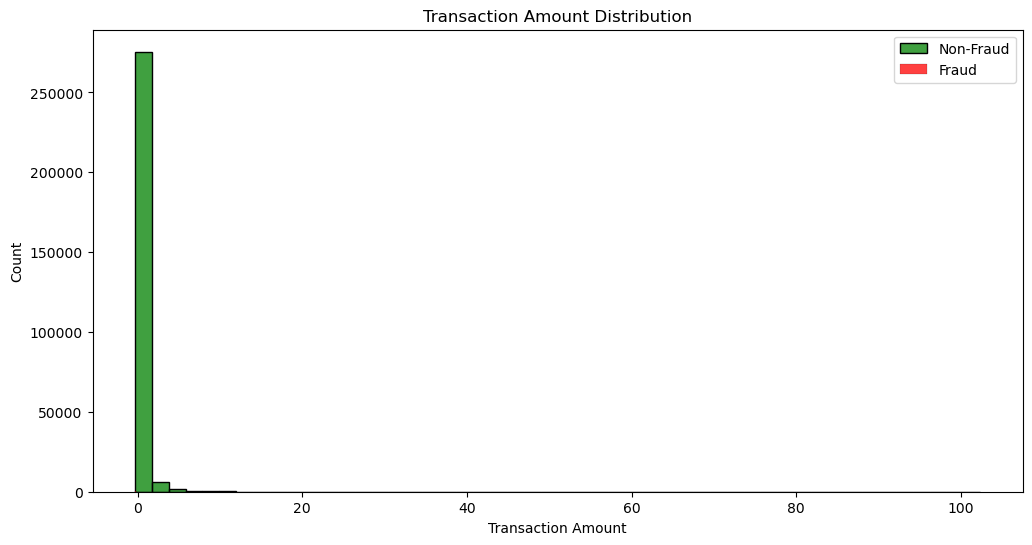

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='g', label='Non-Fraud')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='r', label='Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()


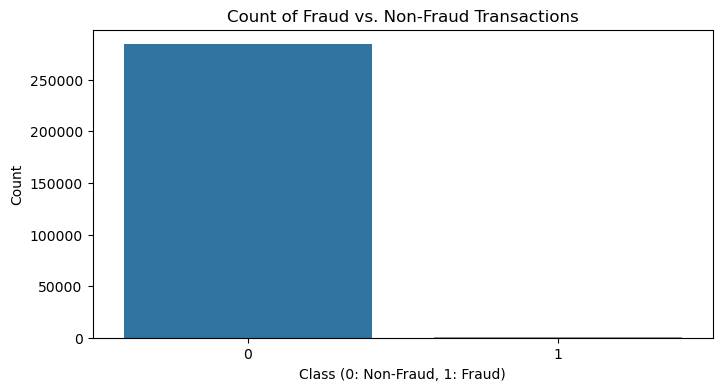

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of fraud vs. non-fraud transactions
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Class')
plt.title('Count of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()



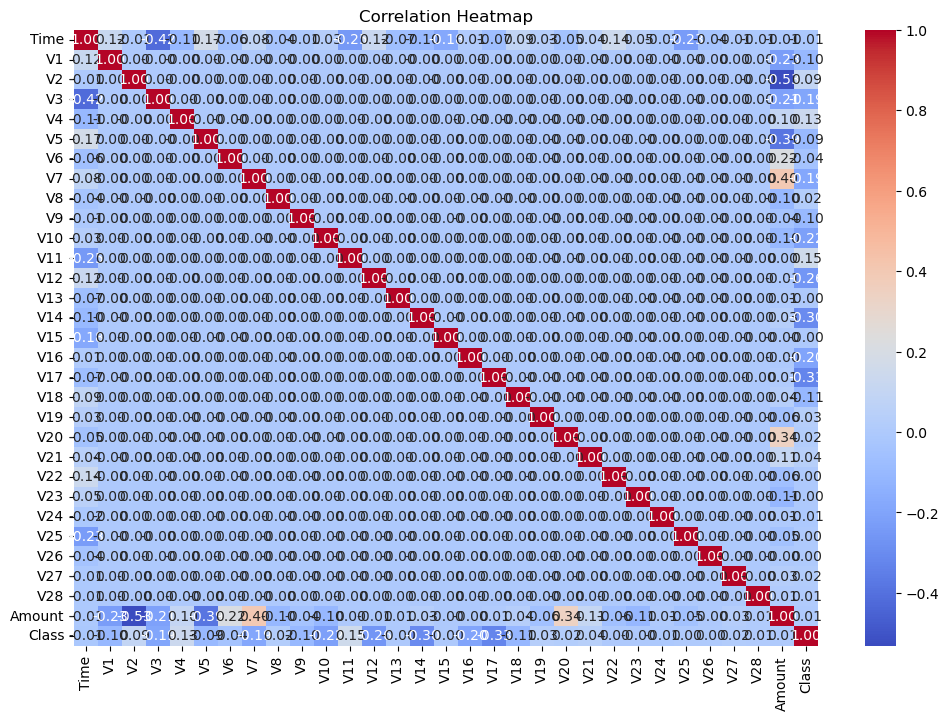

In [31]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


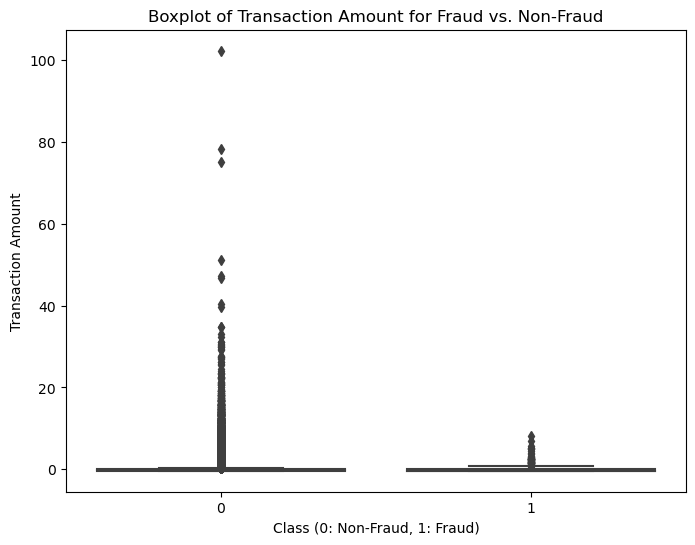

In [32]:
# Boxplot of transaction amounts for fraud and non-fraud cases
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount for Fraud vs. Non-Fraud')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()


C:\Users\Narthana\AppData\Local\Temp\ipykernel_20904\4206626236.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 0]['Amount'], label='Non-Fraud', shade=True, color='g')
C:\Users\Narthana\AppData\Local\Temp\ipykernel_20904\4206626236.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['Class'] == 1]['Amount'], label='Fraud', shade=True, color='r')


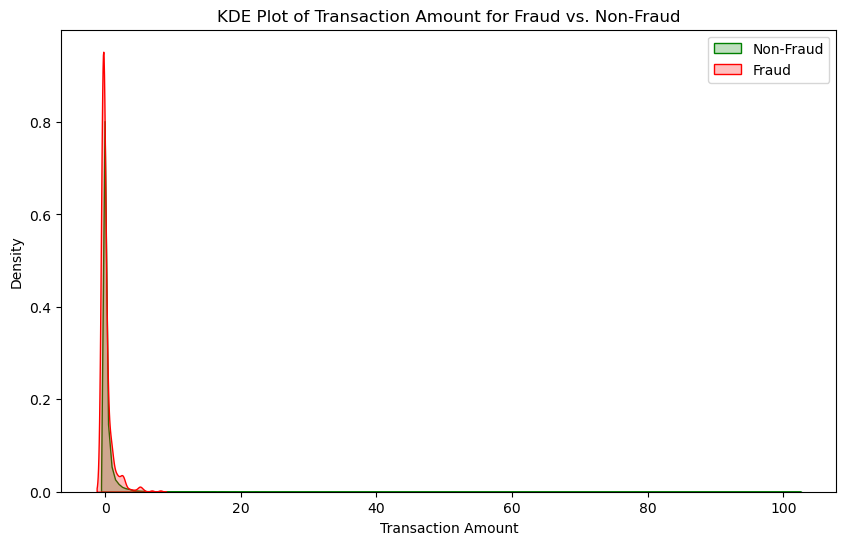

In [33]:
# KDE plot of transaction amount for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Class'] == 0]['Amount'], label='Non-Fraud', shade=True, color='g')
sns.kdeplot(data[data['Class'] == 1]['Amount'], label='Fraud', shade=True, color='r')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend()
plt.title('KDE Plot of Transaction Amount for Fraud vs. Non-Fraud')
plt.show()


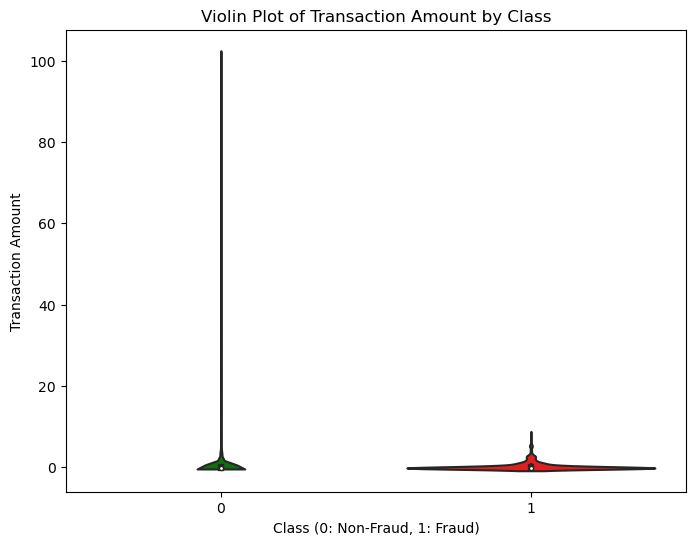

In [34]:
# Violin plot of transaction amount by class
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='Class', y='Amount', palette=['g', 'r'])
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.title('Violin Plot of Transaction Amount by Class')
plt.show()


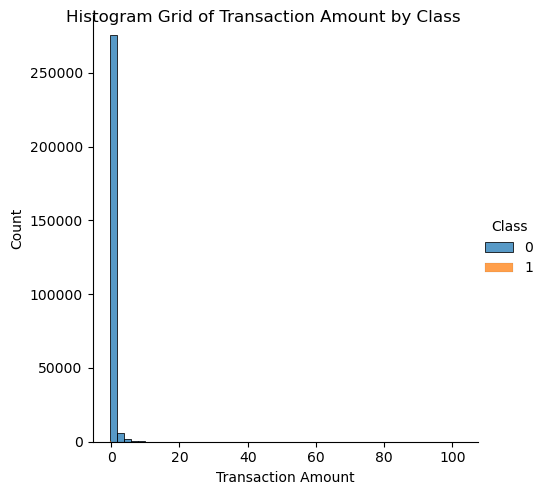

In [35]:
# Create a histogram grid for selected features
grid = sns.FacetGrid(data, hue='Class', height=5)
grid.map(sns.histplot, 'Amount', bins=50)
grid.add_legend()
grid.set_axis_labels('Transaction Amount', 'Count')
plt.suptitle('Histogram Grid of Transaction Amount by Class')
plt.show()


These visualizations provide insights into the distribution of fraud and non-fraud transactions, the relationship between transaction amount and class, and the correlation between features in the dataset. You can customize these plots further to gain a deeper understanding of the data.

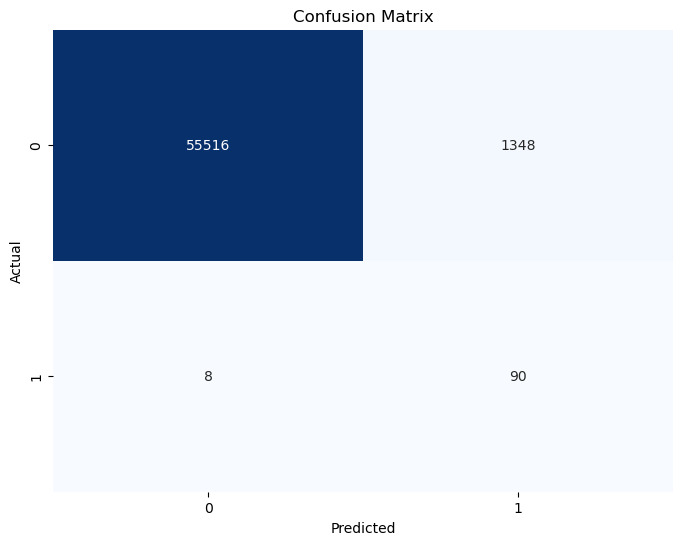

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


A confusion matrix helps you understand the performance of your model by showing the true positive, true negative, false positive, and false negative predictions. 